As always, we start by loading our modules and doing a bit of set up:



In [1]:
import pandas as pd
import numpy as np
from plotnine import *

theme_set(theme_minimal())
ubase = "https://raw.githubusercontent.com/distant-viewing/hdpy/refs/heads/main/"



## Movies Datasets

Here are four related datasets concerning the top 100 grossing films from each year
between 1970 and 2019. We'll talk about these in class and identify the units of
observation, primary keys, and foreign keys of each.



In [2]:
movies = pd.read_csv(ubase + "data/movies_50_years.csv")
movies.head(10)

,year,title,mpa,runtime,gross,rating_count,rating,metacritic,poster_brightness,poster_saturation,poster_edgeness,description
0,1970,Love Story,PG,100.0,106.40,28330,6.9,NaN,79.039734,8.029792,4.586166,A boy and a girl from different backgrounds fa...
1,1970,Airport,G,137.0,100.49,16512,6.6,42.0,70.735160,29.284572,4.954735,"A bomber on board an airplane, an airport almo..."
2,1970,MASH,R,116.0,81.60,64989,7.5,NaN,74.540002,40.103629,3.510285,The staff of a Korean War field hospital use h...
3,1970,Patton,GP,172.0,61.70,90461,7.9,NaN,83.128991,17.433850,3.657574,The World War II phase of the career of contro...
4,1970,The AristoCats,G,78.0,37.68,87551,7.1,NaN,79.794746,12.481992,4.400358,"With the help of a smooth talking tomcat, a fa..."
5,1970,Little Big Man,PG-13,139.0,31.56,31412,7.6,NaN,67.965838,9.016387,5.359520,"Jack Crabb, looking back from extreme old age,..."
6,1970,Tora! Tora! Tora!,G,144.0,29.55,30347,7.5,46.0,39.795288,48.606459,2.112136,"In 1941, following months of economic embargo,..."
7,1970,Catch-22,R,122.0,24.91,20997,7.2,NaN,62.280545,35.966209,3.654681,A man is trying desperately to be certified in...
8,1970,The Owl and the Pussycat,PG,95.0,23.68,3107,6.5,NaN,67.221139,10.242554,4.894551,A stuffy author enters into an explosive relat...
9,1970,Joe,R,107.0,19.32,2633,6.8,NaN,31.826858,27.578054,4.229543,"Two men, Bill, a wealthy conservative, and Joe..."


In [20]:
people = pd.read_csv(ubase + "data/movies_50_years_people.csv")
people.head(10)

,year,title,role,rank,person,gender,gender_conf
0,1970,Love Story,director,1,Arthur Hiller,male,0.9937
1,1970,Love Story,starring,1,Ali MacGraw,male,0.6877
2,1970,Love Story,starring,2,Ryan O'Neal,male,0.9768
3,1970,Love Story,starring,3,John Marley,male,0.9961
4,1970,Love Story,starring,4,Ray Milland,male,0.9840
5,1970,Airport,director,1,George Seaton,male,0.9932
6,1970,Airport,director,2,Henry Hathaway,male,0.9935
7,1970,Airport,starring,1,Burt Lancaster,male,1.0000
8,1970,Airport,starring,2,Dean Martin,male,0.9875
9,1970,Airport,starring,3,George Kennedy,male,0.9932


In [4]:
genre = pd.read_csv(ubase + "data/movies_50_years_genre.csv")
genre.head(10)

,year,title,genre
0,1970,Love Story,Drama
1,1970,Love Story,Romance
2,1970,Airport,Action
3,1970,Airport,Drama
4,1970,Airport,Thriller
5,1970,MASH,Comedy
6,1970,MASH,Drama
7,1970,MASH,War
8,1970,Patton,Biography
9,1970,Patton,Drama


In [5]:
color = pd.read_csv(ubase + "data/movies_50_years_color.csv")
color.head(10)

,year,title,color_type,color,percentage
0,1970,Love Story,hue,red,2.635655
1,1970,Love Story,hue,orange,3.093356
2,1970,Love Story,hue,yellow,0.054209
3,1970,Love Story,hue,green,0.236061
4,1970,Love Story,hue,blue,0.319376
5,1970,Love Story,hue,violet,0.000534
6,1970,Love Story,greyscale,black,10.963736
7,1970,Love Story,greyscale,grey,6.908246
8,1970,Love Story,greyscale,white,75.788827
9,1970,Love Story,hue,other,0.000000




Finally, we are going to use the pivot method to create a modified version of the color
dataset.



In [6]:
color_pivot = (
    color
    .pivot(
        columns="color", values="percentage", index=["year", "title"]
    )
    .reset_index()
)
color_pivot

color,year,title,black,blue,green,grey,orange,other,red,violet,white,yellow
0,1970,...tick... tick... tick...,7.693657,0.295277,0.000000,69.617274,0.343320,0.0,1.547368,0.015924,20.471525,0.015655
1,1970,A Man Called Horse,18.366367,12.353823,0.015141,14.469906,2.297008,0.0,12.074866,0.143672,40.190771,0.088447
2,1970,A Voyage to Arcturus,1.063675,0.007574,2.259748,15.857784,3.911641,0.0,65.069285,0.029734,11.253576,0.546985
3,1970,Airport,1.420563,39.505519,0.144491,9.650144,4.989765,0.0,0.590809,0.044953,40.172854,3.480902
4,1970,Alex in Wonderland,73.455914,0.002765,0.013210,1.507220,1.445008,0.0,1.046237,0.000307,12.547773,9.981567
...,...,...,...,...,...,...,...,...,...,...,...,...
4693,2019,What Men Want,29.076901,38.574819,0.072359,11.781887,0.111860,0.0,13.918736,0.002509,6.435349,0.025580
4694,2019,"Where'd You Go, Bernadette",23.628922,34.696724,0.010288,4.638156,2.206716,0.0,25.003951,0.000000,6.392313,3.422930
4695,2019,Wonder Park,10.924539,15.640755,0.032813,10.076509,8.586227,0.0,36.912200,1.543952,13.389633,2.893374
4696,2019,X-Men: Dark Phoenix,22.710550,20.454946,0.001308,10.444815,1.397973,0.0,36.381574,3.053637,5.380717,0.174481




## Analysis: Part I

Below, create a dataset named `movies_agg` that has one row for each year in our dataset
with the average poster brightness for movies made in that year as a variable.



In [14]:
movies_agg = (
    movies
    .groupby("year")
    .agg(
        avg_poster_brightness = ("poster_brightness","mean")
    )
    .reset_index()
)
movies_agg

,year,avg_poster_brightness
0,1970,61.754469
1,1971,59.226516
2,1972,54.266977
3,1973,56.035649
4,1974,56.891644
5,1975,55.947459
6,1976,53.696600
7,1977,53.716219
8,1978,50.764021
9,1979,49.980686




Using the dataset that you made above, draw a line plot (`geom_line`) with year
on the x-axis and the average poster brightness on the y-axis. Take note of any
patterns.



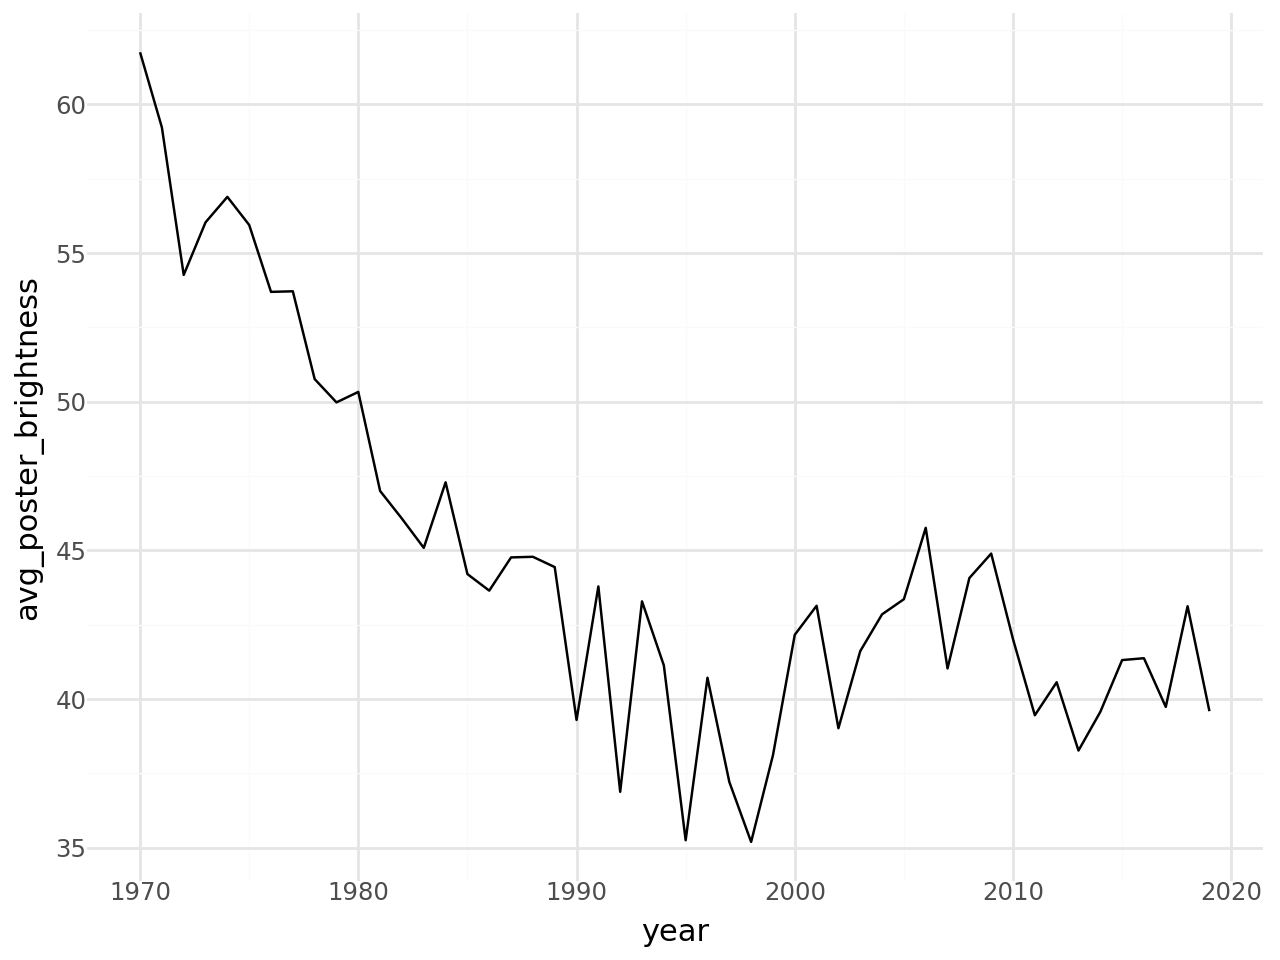

In [16]:
(
    ggplot(movies_agg)
    + geom_line(aes(x="year", y="avg_poster_brightness"))
)



Now, compute the proportion of starring actors (I'll use this term to include all
genders) that are labelled as "female" in our dataset by year. So, each row of the
output you create should have a single year and the proportion of female leads.



In [25]:
movies_f_actors = (
    people
    .query("role == 'starring'")
    .eval("f_prop = (gender == 'female')")
    .groupby("year")
    .agg(
        percent_female = ("f_prop", "mean")
    )
)
movies_f_actors

,percent_female
year,
1970,0.330667
1971,0.366771
1972,0.339181
1973,0.320000
1974,0.320872
1975,0.332335
1976,0.336735
1977,0.321981
1978,0.296512




Now, create a dataset named `director_gender` that has one rowfor each film and a True/False
flag indicating whether at least one of the directors (a few have multiple) is listed as
female. Hint: Use the "max" aggregation function.



In [30]:
director_gender = (
    people
    .query("role == 'director'")
    .eval("is_female = (gender == 'female')")
    .groupby(["year","title"])
    .agg(
        has_female_dir = ("is_female","max")
    )
)
director_gender.head(10)

has_female_dir
year title                                                             
1970 ...tick... tick... tick... - Et la violence exp...           False
     A Voyage to Arcturus                                         False
     Airport                                                      False
     Alex in Wonderland                                           False
     Angel Unchained                                              False
     Appelez-moi Monsieur Tibbs                                   False
     Barquero                                                     False
     Billy Boy                                                    False
     Brewster McCloud                                             False
     Campus ou C.Q.F.D.                                           False



Finally, merge the `genre` datasett with the `director_gender` dataset you created above.
Group by the genre categories and compute the percentage of films by genre that have at
least one female director. Sort the results. Do this follow or resist stereotypes of Women's
cinema?



In [42]:
merged_genre = (
    genre
    .merge(director_gender,on="title")
    .groupby("genre")
    .agg(
        female_prop = ("has_female_dir", "mean")
    )
    .sort_values("female_prop", ascending = False)
)

merged_genre

,female_prop
genre,
Music,0.120805
Animation,0.118467
Romance,0.112713
Biography,0.103774
History,0.087379
Comedy,0.073608
Musical,0.073529
Drama,0.070334
Sport,0.067669





## Analysis: Part II

Use the `color_pivot` dataset to draw a plot showning the relationship between
white and red on a movie poster. In other words, just draw a simple scatterplot.
This should be easy, but take note of how hard (impossible?) it would be to do this
with the `color` dataset as given before the pivot.



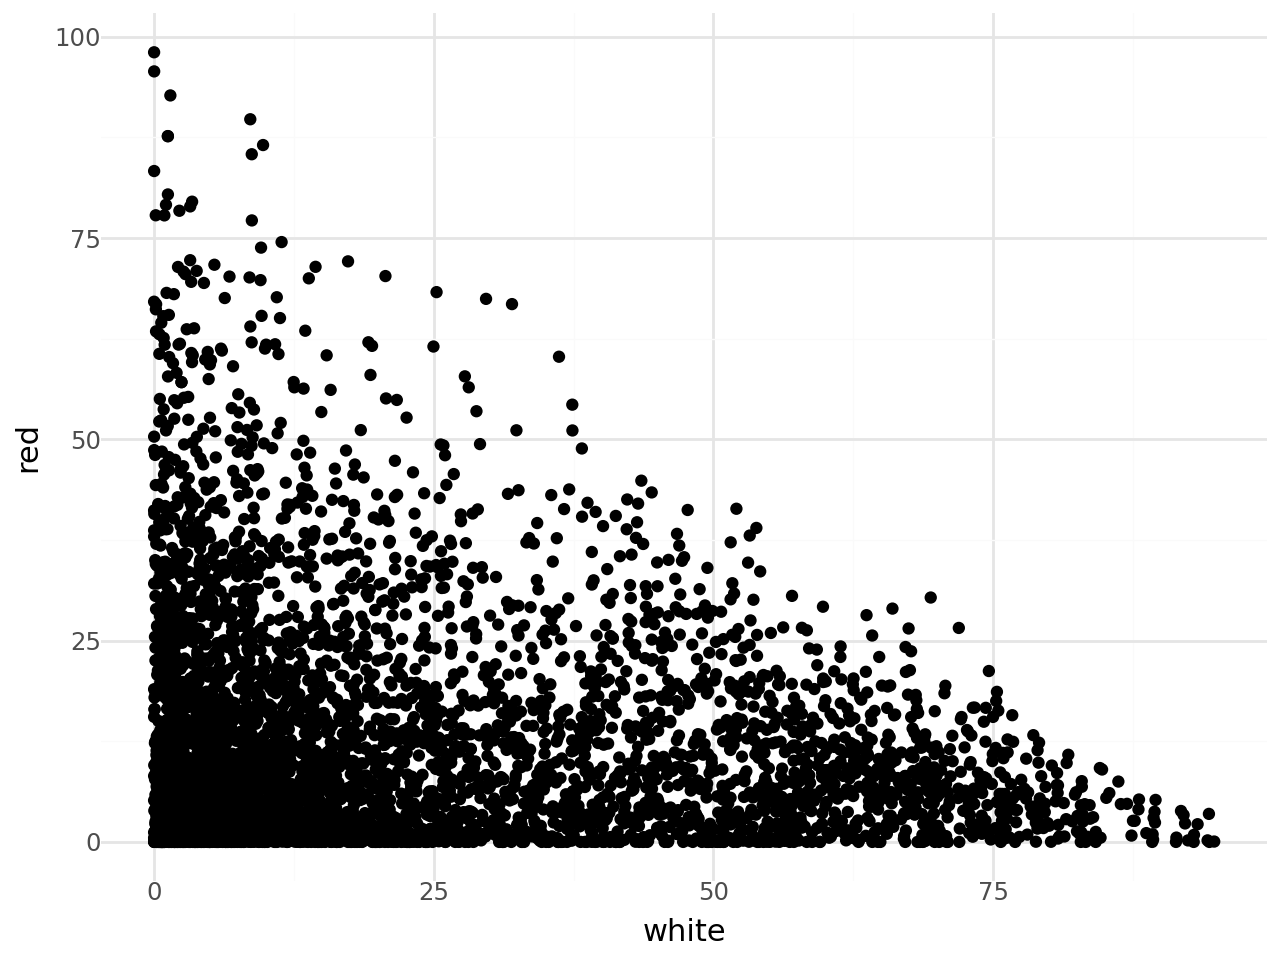

In [45]:
(
    ggplot(color_pivot)
    + geom_point(aes(x="white",y="red"))
)



Finally, we want to `color` dataset to compute the number of movie posters with a
specific dominant color (i.e., the color with the largest proportion on a poster).
To do this, query just the rows that have `color_type=='hue'`. Then, sort by
"title", "year", and "percentage" in descending order. Then, group by year and title
and take the head of the first row. From there, it's a straightforward group + agg +
reset_index and sort as usual. Take your time, looking at the results step-by-step.
What color(s) is/are the most dominant? Note how this would be extremely difficult
(impossible?) using the pivoted dataset.



In [49]:
(
    color
    .query("color_type == 'hue'")
    .sort_values(["title","year","percentage"], ascending = False)
    .groupby(["year","title"])
    .head(1)
    .groupby("color")
    .agg(
        dom_col = ("percentage","count")
    )
    .sort_values("dom_col", ascending = False)
)

,dom_col
color,
red,2581
blue,1244
orange,539
yellow,221
green,84
violet,29
